# House predictions with linear regression

In [3]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
file_path = 'Hyderabad.csv'
data = pd.read_csv(file_path)
data.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


### Exploring the relationship between price and area

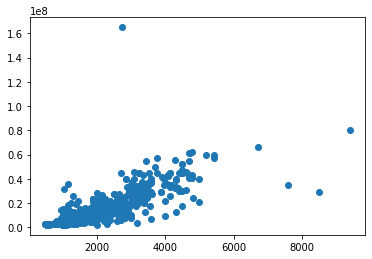

In [5]:
plt.scatter(data['Area'], data['Price'])

In [6]:
# Extract features (X) and target (y)
X = data[['Area']]  # Feature: Area
y = data['Price']  # Target: Price

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# Print the coefficients
print(f"y-intercept: {model.intercept_}")
print(f"slope (coefficient of Area): {model.coef_[0]}")

y-intercept: -6222669.083283698
slope (coefficient of Area): 9753.940608184039


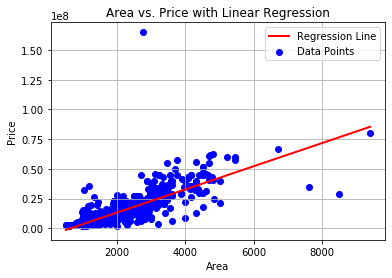

In [8]:
# Predict prices for a range of Area values to plot the regression line
area_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
predicted_prices = model.predict(area_range)

# Plot the original data points
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the regression line
plt.plot(area_range, predicted_prices, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs. Price with Linear Regression')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

### Building a model that uses all the features

In [9]:
data

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


### Pre-processing the data
In order to train a model in scikit-learn, we need to pre-process the data:
1. Remove missing values
2. Scale and center the numerical features
3. One-hot encode the categorical features

In [19]:
# First, we remove the bottom rows, which have missing data (encoded as '9')
data_truncated = data[:2434]
data_truncated

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429,4500000,1250,Kollur Road,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2430,3503000,1001,Miyapur,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2431,5600000,1551,chandrayangutta,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2432,7500000,3000,Jubilee Hills,3,1,1,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0


In [20]:
# Scaling and centering the numerical features

data_scaled = data_truncated.copy()

# Calculate mean and standard deviation for 'Area'
area_mean = data_scaled['Area'].mean()
area_std = data_scaled['Area'].std()

# Scale and center 'Area'
data_scaled['Area'] = (data_scaled['Area'] - area_mean) / area_std

# Calculate mean and standard deviation for 'No. of Bedrooms'
bedrooms_mean = data_scaled['No. of Bedrooms'].mean()
bedrooms_std = data_scaled['No. of Bedrooms'].std()

# Scale and center 'No. of Bedrooms'
data_scaled['No. of Bedrooms'] = (data_scaled['No. of Bedrooms'] - bedrooms_mean) / bedrooms_std

# Print the head of the new dataframe to verify
print(data_scaled.head())

      Price      Area     Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0   6968000 -0.406547     Nizampet        -0.913997       0                 0   
1  29000000  2.477960  Hitech City         2.005515       0                 0   
2   6590000 -0.435953    Manikonda        -0.913997       0                 0   
3   5739000 -0.466696        Alwal         0.545759       1                 0   
4   5679000 -0.667195   Kukatpally        -0.913997       0                 0   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          1             1                  1             1  ...   
1          1             1                  1             1  ...   
2          1             0                  0             0  ...   
3          0             0                  0             0  ...   
4          0             0                  1             0  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              1    0              

In [21]:
# One-hot encoding the Location feature

data_scaled_encoded = pd.get_dummies(data_scaled, columns=['Location'], prefix='Location', dtype=int)

In [23]:
data_scaled_encoded

# Print the head of the new dataframe
print(data_scaled_encoded.head())

      Price      Area  No. of Bedrooms  Resale  MaintenanceStaff  Gymnasium  \
0   6968000 -0.406547        -0.913997       0                 0          1   
1  29000000  2.477960         2.005515       0                 0          1   
2   6590000 -0.435953        -0.913997       0                 0          1   
3   5739000 -0.466696         0.545759       1                 0          0   
4   5679000 -0.667195        -0.913997       0                 0          0   

   SwimmingPool  LandscapedGardens  JoggingTrack  RainWaterHarvesting  ...  \
0             1                  1             1                    1  ...   
1             1                  1             1                    1  ...   
2             0                  0             0                    0  ...   
3             0                  0             0                    0  ...   
4             0                  1             0                    0  ...   

   Location_Zamistanpur  Location_chandrayangutta  \
0  

### Fit a Linear Regression model

In [25]:
# Separate features (X) and target (y) from the scaled and encoded data
# 'Price' is the target variable
X_full = data_scaled_encoded.drop('Price', axis=1)
y_full = data_scaled_encoded['Price']

# Create a Linear Regression model
model_predict_all = LinearRegression()

# Fit the model to the data
model_predict_all.fit(X_full, y_full)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Print the coefficients of the model

print("\nLinear Regression Model Coefficients (Predicting Price from all features):")
print(f"Intercept: {model_predict_all.intercept_}")
print("Coefficients for features:")
for feature, coef in zip(X_full.columns, model_predict_all.coef_):
    print(f"{feature}: {coef}")


Linear Regression Model Coefficients (Predicting Price from all features):
Intercept: 7.289475066216182e+17
Coefficients for features:
Area: 7023646.11785271
No. of Bedrooms: -947024.4751411562
Resale: 1241786.225419256
MaintenanceStaff: -1009506.7400020678
Gymnasium: -565315.3977739261
SwimmingPool: -73374.3994672345
LandscapedGardens: 887798.0957348756
JoggingTrack: -617391.0842314134
RainWaterHarvesting: -498341.01065160136
IndoorGames: 380890.2911424009
ShoppingMall: 655484.6304730112
Intercom: -130284.21876013489
SportsFacility: -15196.07432913367
ATM: -266035.47818067245
ClubHouse: 377411.78924977407
School: -2611485.1830037413
24X7Security: -143856.24730929872
PowerBackup: 166029.42136578623
CarParking: -227978.05309004663
StaffQuarter: 514539.6989801759
Cafeteria: 1170884.4695955578
MultipurposeRoom: 337637.6835709263
Hospital: 1876187.6154221883
WashingMachine: 708408.3426074646
Gasconnection: 770882.3045270124
AC: 559772.2138648367
Wifi: 806972.8087567722
Children'splayarea: